In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("1. Regression - Module - (Housing Prices).csv")
df.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [61]:
df1 = df.copy()

In [62]:
def roun(a):
    return round(a)

In [63]:
df1["No of Bathrooms"].isnull().any()

True

In [64]:
df1["No of Bedrooms"].isnull().any()

False

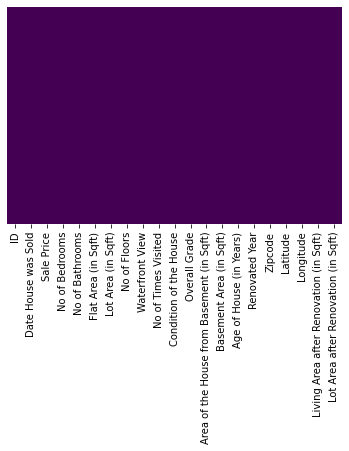

In [65]:
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [66]:
df1.isnull().any()

ID                                           False
Date House was Sold                          False
Sale Price                                    True
No of Bedrooms                               False
No of Bathrooms                               True
Flat Area (in Sqft)                           True
Lot Area (in Sqft)                            True
No of Floors                                 False
Waterfront View                              False
No of Times Visited                          False
Condition of the House                       False
Overall Grade                                False
Area of the House from Basement (in Sqft)     True
Basement Area (in Sqft)                      False
Age of House (in Years)                      False
Renovated Year                               False
Zipcode                                       True
Latitude                                      True
Longitude                                     True
Living Area after Renovation (i

In [67]:
df1 = df1.drop(["Latitude", "Longitude",], axis = 1)

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [69]:
df1 = df1.drop(["Renovated Year"], axis = 1)

In [70]:
df1.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,98178.0,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,98125.0,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,98028.0,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,98136.0,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,98074.0,1800.0,7503


In [71]:
def convert_bedrooms(a):
    return round(a)

In [72]:
df2 = df1.copy()

In [73]:
df2["No of Bedrooms"] = df[["No of Bedrooms"]].apply(convert_bedrooms,axis = 1)

In [74]:
df2.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,98178.0,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,98125.0,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,98028.0,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,98136.0,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,98074.0,1800.0,7503


In [75]:
df2["No of Bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

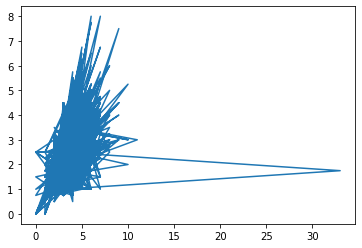

In [76]:
plt.plot(df['No of Bedrooms'], df['No of Bathrooms'])

<BarContainer object of 21613 artists>

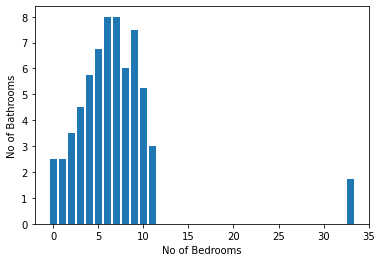

In [93]:
plt.xlabel('No of Bedrooms')
plt.ylabel('No of Bathrooms')
plt.bar(df2["No of Bedrooms"],df2["No of Bathrooms"])

In [79]:
df2.isnull().any()

ID                                           False
Date House was Sold                          False
Sale Price                                    True
No of Bedrooms                               False
No of Bathrooms                               True
Flat Area (in Sqft)                           True
Lot Area (in Sqft)                            True
No of Floors                                 False
Waterfront View                              False
No of Times Visited                          False
Condition of the House                       False
Overall Grade                                False
Area of the House from Basement (in Sqft)     True
Basement Area (in Sqft)                      False
Age of House (in Years)                      False
Zipcode                                       True
Living Area after Renovation (in Sqft)        True
Lot Area after Renovation (in Sqft)          False
dtype: bool

In [87]:
temp = df2[df2["No of Bedrooms"]>=30]

In [88]:
temp

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
15870,2402100895,14-Jun-17,640000.0,33,1.75,1620.0,6000.0,1.0,No,None,Excellent,7,1040.0,580,71,98103.0,1330.0,4700


In [137]:
df3 = df2.copy()

In [138]:
df3 = df3.drop(["ID", "Date House was Sold","Zipcode"], axis = 1)

In [139]:
df3.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,1800.0,7503


In [140]:
def convert_bathrooms(col):
    bathrooms= col[0]
    bedrooms = col[1]
    if bedrooms == 0 or bedrooms == 1:
        return 3
    else :
        return bedrooms+2 

In [141]:
df3["No of Bathrooms"] = df3[["No of Bathrooms","No of Bedrooms"]].apply(convert_bathrooms, axis = 1)

<BarContainer object of 21613 artists>

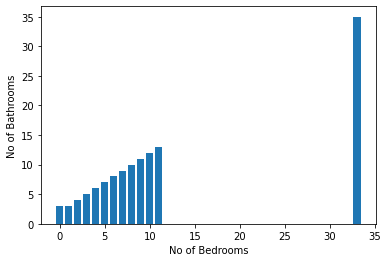

In [110]:
plt.xlabel('No of Bedrooms')
plt.ylabel('No of Bathrooms')
plt.bar(df3["No of Bedrooms"],df3["No of Bathrooms"])

In [142]:
df3.isnull().any()

Sale Price                                    True
No of Bedrooms                               False
No of Bathrooms                              False
Flat Area (in Sqft)                           True
Lot Area (in Sqft)                            True
No of Floors                                 False
Waterfront View                              False
No of Times Visited                          False
Condition of the House                       False
Overall Grade                                False
Area of the House from Basement (in Sqft)     True
Basement Area (in Sqft)                      False
Age of House (in Years)                      False
Living Area after Renovation (in Sqft)        True
Lot Area after Renovation (in Sqft)          False
dtype: bool

In [143]:
df4 = df3.copy()

In [144]:
df4 = df4.drop(["Living Area after Renovation (in Sqft)","Area of the House from Basement (in Sqft)"], axis = 1)

In [145]:
df4.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Lot Area after Renovation (in Sqft)
0,221900.0,3,5.0,1180.0,5650.0,1.0,No,None,Fair,7,0,63,5650
1,538000.0,3,5.0,2570.0,7242.0,2.0,No,None,Fair,7,400,67,7639
2,180000.0,2,4.0,770.0,10000.0,1.0,No,None,Fair,6,0,85,8062
3,604000.0,4,6.0,1960.0,5000.0,1.0,No,None,Excellent,7,910,53,5000
4,510000.0,3,5.0,1680.0,8080.0,1.0,No,None,Fair,8,0,31,7503


In [146]:
df4.isnull().any()

Sale Price                              True
No of Bedrooms                         False
No of Bathrooms                        False
Flat Area (in Sqft)                     True
Lot Area (in Sqft)                      True
No of Floors                           False
Waterfront View                        False
No of Times Visited                    False
Condition of the House                 False
Overall Grade                          False
Basement Area (in Sqft)                False
Age of House (in Years)                False
Lot Area after Renovation (in Sqft)    False
dtype: bool

<BarContainer object of 21613 artists>

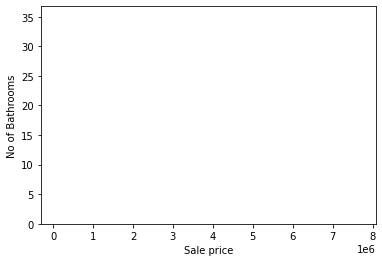

In [119]:
plt.xlabel('Sale price')
plt.ylabel('No of Bathrooms')
plt.bar(df4["Sale Price"],df4["No of Bathrooms"])

In [148]:
df4["Waterfront View"] = df4["Waterfront View"].apply(lambda a : 1 if a =="Yes" else  0)

In [149]:
df4.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Lot Area after Renovation (in Sqft)
0,221900.0,3,5.0,1180.0,5650.0,1.0,0,None,Fair,7,0,63,5650
1,538000.0,3,5.0,2570.0,7242.0,2.0,0,None,Fair,7,400,67,7639
2,180000.0,2,4.0,770.0,10000.0,1.0,0,None,Fair,6,0,85,8062
3,604000.0,4,6.0,1960.0,5000.0,1.0,0,None,Excellent,7,910,53,5000
4,510000.0,3,5.0,1680.0,8080.0,1.0,0,None,Fair,8,0,31,7503


In [151]:
def condition_of_house(a):
    
    if a== "Excellent":
        return 5
    elif a == "Fair":
        return 4
    elif a == "Good":
        return 3
    elif a == "Okay":
        return 2
    else:
        return 1

In [152]:
df4["Condition of the House"] = df4["Condition of the House"].apply(condition_of_house)

In [153]:
df4.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Lot Area after Renovation (in Sqft)
0,221900.0,3,5.0,1180.0,5650.0,1.0,0,None,4,7,0,63,5650
1,538000.0,3,5.0,2570.0,7242.0,2.0,0,None,4,7,400,67,7639
2,180000.0,2,4.0,770.0,10000.0,1.0,0,None,4,6,0,85,8062
3,604000.0,4,6.0,1960.0,5000.0,1.0,0,None,5,7,910,53,5000
4,510000.0,3,5.0,1680.0,8080.0,1.0,0,None,4,8,0,31,7503


In [154]:
from word2number import w2n

In [160]:
def convert_word_to_number(a):
    if a == "None":
        return 0
    else:
        if a == "Once":
            return 1
        elif a == "Twice":
            return 2
        elif a == "Thrice":
            return 3
        elif a == "Four":
            return 4

In [161]:
df4["No of Times Visited"] = df4["No of Times Visited"].apply(convert_word_to_number)

In [162]:
df4.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Lot Area after Renovation (in Sqft)
0,221900.0,3,5.0,1180.0,5650.0,1.0,0,0,4,7,0,63,5650
1,538000.0,3,5.0,2570.0,7242.0,2.0,0,0,4,7,400,67,7639
2,180000.0,2,4.0,770.0,10000.0,1.0,0,0,4,6,0,85,8062
3,604000.0,4,6.0,1960.0,5000.0,1.0,0,0,5,7,910,53,5000
4,510000.0,3,5.0,1680.0,8080.0,1.0,0,0,4,8,0,31,7503


In [163]:
from sklearn.model_selection import train_test_split

In [183]:
df5 = df4.copy()

In [184]:
df5 = df5.dropna()

In [185]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21591 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sale Price                           21591 non-null  float64
 1   No of Bedrooms                       21591 non-null  int64  
 2   No of Bathrooms                      21591 non-null  float64
 3   Flat Area (in Sqft)                  21591 non-null  float64
 4   Lot Area (in Sqft)                   21591 non-null  float64
 5   No of Floors                         21591 non-null  float64
 6   Waterfront View                      21591 non-null  int64  
 7   No of Times Visited                  21591 non-null  int64  
 8   Condition of the House               21591 non-null  int64  
 9   Overall Grade                        21591 non-null  int64  
 10  Basement Area (in Sqft)              21591 non-null  int64  
 11  Age of House (in Years)     

In [186]:
df5.isnull().any()

Sale Price                             False
No of Bedrooms                         False
No of Bathrooms                        False
Flat Area (in Sqft)                    False
Lot Area (in Sqft)                     False
No of Floors                           False
Waterfront View                        False
No of Times Visited                    False
Condition of the House                 False
Overall Grade                          False
Basement Area (in Sqft)                False
Age of House (in Years)                False
Lot Area after Renovation (in Sqft)    False
dtype: bool

In [187]:
Y = df5["Sale Price"]

In [190]:
X = df5.drop(["Sale Price", "Lot Area after Renovation (in Sqft)","Basement Area (in Sqft)"], axis = 1)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Age of House (in Years)
0,3,5.0,1180.0,5650.0,1.0,0,0,4,7,63
1,3,5.0,2570.0,7242.0,2.0,0,0,4,7,67
2,2,4.0,770.0,10000.0,1.0,0,0,4,6,85
3,4,6.0,1960.0,5000.0,1.0,0,0,5,7,53
4,3,5.0,1680.0,8080.0,1.0,0,0,4,8,31


In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 101)

In [192]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [193]:
model.fit(X_train, Y_train)

MemoryError: Unable to allocate 418. MiB for an array with shape (17272, 3175) and data type int64

In [181]:
model.score(X_test, Y_test)

AttributeError: 'list' object has no attribute 'shape'

In [194]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model